In [1]:
# Задача 1
import pandas as pd
neiss = pd.read_excel('neiss2017_1000sample.xlsx')
neiss.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,2017-01-01,21,1,1,NaN,75,62,NaN,1,1,0,1207,0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,2017-01-01,71,1,1,NaN,31,53,NaN,1,5,0,1807,0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,2017-01-01,16,1,1,NaN,33,51,NaN,1,1,0,676,342,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,2017-01-01,55,2,1,NaN,75,62,NaN,1,1,0,620,0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,2017-01-01,86,2,1,NaN,79,58,NaN,1,1,0,1646,4056,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


# Описание имеющихся данных
    Начнем с рассмотрения данных, представленных в исследуемом датасете, а именно, представим, где необходимо, пояснения 
    по значениям в колонках и опишем смысл самих колонок.
    
**1). CPSC_Case_Number** - уникальный номер поступившего в больницу "дела"   

**2). Treatment_Date** - дата начала работы (лечения) над конкретным "делом" 

**3). Age** - возраст пациента 

    Примечание: если пациент младше 2-х лет, его возраст записывается в месяцах в виде трёхзначного числа 2xx, где xx - 
    возраст в месяцах. Для детей младше 1-го месяца записывается 1 месяц.

Далее для каждой колонки, содержащей дискретные данные, рассмотрим вариации этих данных и опишем те, что встречаются в выборке.

**4). Sex** - пол пациента

In [2]:
neiss.Sex.value_counts()

1    521
2    478
Name: Sex, dtype: int64

Как видим, в нашей выборке присутствует только 2 значения для пола (бывают еще случаи, когда пол не записан). 

1 - Мужской <br>
2 - Женский 

**5). Race** - расса пациента

In [3]:
neiss.Race.value_counts()

0    491
1    339
2    122
3     32
4     14
5      1
Name: Race, dtype: int64

Встречается 6 различных вариаций рассы, опишем их:

0 - нет информации о рассе пациента <br>
1 - Белый <br>
2 - Черный / Афроамериканец <br>
4 - Азиат <br>
5 - Американский индеец / Коренной житель Аляски <br>
3 - "Другая расса", ни одна из описанных не подходит 

**6). Other_Race** - уточнение в случае смешанной или "другой" рассы

In [4]:
neiss.Other_Race.value_counts()

HISPANIC        17
MULTI-RACIAL     9
UNKNOWN          7
Name: Other_Race, dtype: int64

Видим 3 вариации этого параметра в выборке, их обозначения говорят сами за себя.

**7). Body_Part** - закодированное обозначение для поврежденной части тела 

Различных вариаций этого параметра довольно много, поэтому не будем описывать каждый отдельно, вместо этого приложим таблицу с описанием всех:
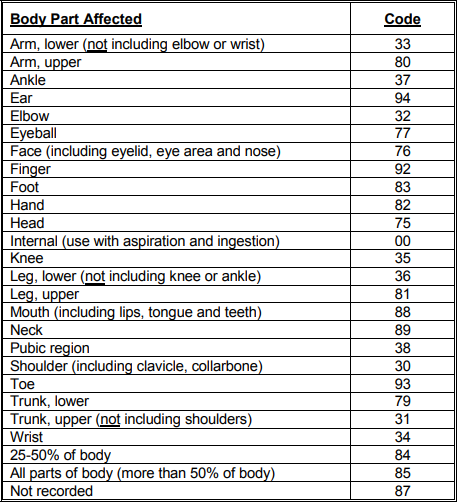

**8). Diagnosis** - диагноз пациента, описание также представим в таблице
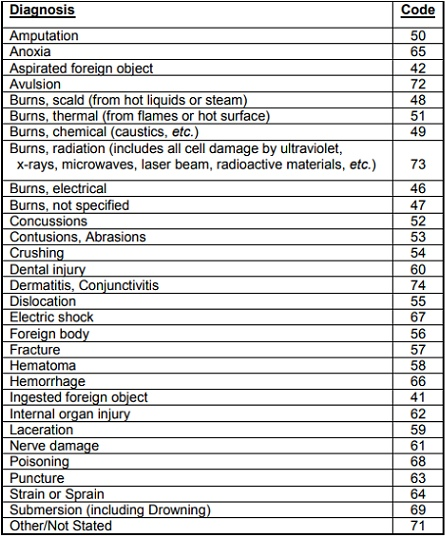

**9). Other_Diagnosis** - уточнение для случая Other / Not Stated в предыдущей колонке

**10). Disposition** - итоговое состояние "дела" после лечения

In [5]:
neiss.Disposition.value_counts()

1    882
4     97
6     11
2      5
5      4
Name: Disposition, dtype: int64

В нашей выборке представлено 5 вариаций данного параметра:

1 - Выписан <br>
2 - В процессе лечения перевезен в другую больницу <br>
4 - В процессе лечения госпитализирован <br>
5 - Оставлен для наблюдения <br>
6 - Покинул больницу по собственному желанию

**11). Location** - где произошел инцидент получения травмы

In [6]:
neiss.Location.value_counts()

1    601
0    212
9     98
5     57
8     23
4      8
Name: Location, dtype: int64

0 - Не записано <br>
1 - Дома <br>
4 - Улица или шоссе <br>
5 - Другое общественное место <br>
8 - Школа <br>
9 - Место для отдыха или спортивная площадка

**12). Fire_Involvement** - задействован ли в инциденте огонь

In [7]:
neiss.Fire_Involvement.value_counts()

0    991
1      4
2      3
3      1
Name: Fire_Involvement, dtype: int64

0 - Огня не было <br>
1 - Контакт с огнем / вдыхание дыма, были привлечены пожарные <br>
2 - -//-, пожарные не были привлечены <br>
3 - -//-, участие пожарных не записано

**13). Product_1** - код одного из предметов, из-за которых была получена травма

Вариаций предметов очень много, будем описывать их по мере необходимости в ходе исследования:

**14). Product_2** - второй такой предмет

    Примечание: если, например, человек на велосипеде въехал в качелю, то в качестве 1-го и 2-го продуктов будут указаны коды велосипеда и качели, порядок не важен. Если инцидент произошел с участием двух идентичных продуктов, в качестве 1-го 
    продукта записывается его код, а в качестве 2-го - 0.
    
**15). Narrative_1** , **16). Narrative_2** - сценарий и последствия инцидента, приведшего к травме 

**17). Stratum** - размер больницы

In [8]:
neiss.Stratum.value_counts()

V     592
M     156
C     122
S      73
L      55
21      1
Name: Stratum, dtype: int64

V - Очень большая больница <br>
M - Средняя больница <br>
C - Детсткая больница <br>
S - Маленькая больница <br>
L - Большая больница <br>
21 - Ошибка в данных, в этой строке с номером 170108911 были сдвинуты значения

**18). PSU** - идентификационный номер больницы 

**19). Weight** - по сути, численное представление колонки Stratum

In [9]:
print(neiss.Weight.value_counts())
print()
print(neiss.Stratum.value_counts())

16.1828    592
87.0904    156
4.7570     122
77.6641     73
67.2099     55
Name: Weight, dtype: int64

V     592
M     156
C     122
S      73
L      55
21      1
Name: Stratum, dtype: int64


Как видим, легко понять соотношение между колонками Weight и Stratum.

# Анализ выборки

### Предварительная работа с исходными данными

Для начала удалим из выборки сдвинутую строчку, которую мы определили на этапе описания исходных данных:

In [10]:
wrongLine = neiss[neiss.Stratum == 21].index[0]
formatted = neiss.drop(wrongLine)
workingSample = formatted.reset_index(drop = True)

Далее рассмотрим выборку на предмет пропущенных значений:

In [11]:
workingSample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 19 columns):
CPSC_Case_Number    998 non-null int64
Treatment_Date      998 non-null datetime64[ns]
Age                 998 non-null int64
Sex                 998 non-null int64
Race                998 non-null int64
Other_Race          33 non-null object
Body_Part           998 non-null int64
Diagnosis           998 non-null int64
Other_Diagnosis     127 non-null object
Disposition         998 non-null int64
Location            998 non-null int64
Fire_Involvement    998 non-null int64
Product_1           998 non-null int64
Product_2           998 non-null int64
Narrative_1         998 non-null object
Narrative_2         596 non-null object
Stratum             998 non-null object
PSU                 998 non-null float64
Weight              998 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(11), object(5)
memory usage: 148.2+ KB


Как видим, пропуски имеются только в тех колонках, которые являются дополнительными примечаниями, при этом имеют качественный характер. Таким образом, не будем их трогать, так как они врядли понадобятся в дальнейшем исследовании.

### Непосредственно анализ и визуализация данных

Поскольку почти все данные нашей выборки являются качественными, нет смысла в общих описательных статистиках. Разве что, можно было бы перевести все значения колонки Age в годы и посчитать средний возраст попавших в выборку, но в этом нет статистического интереса. Вместо этого будем исследовать выборку, беря за основу отдельные колонки. Начнем с возраста.

**Age**

Добавим новую колонку - AgeCat, которая будет классифицировать пациентов по возрасту на группы по следующим правилам:

< 2-х лет - Newborn <br>
2-12 лет - Child <br>
13-18 лет - Adolescence <br>
19-59 лет - Adult <br>
60+ лет - Senior Adult

In [12]:
for i in range(len(workingSample.Age)):
    if workingSample.loc[i, 'Age'] > 200:
        workingSample.loc[i, 'AgeCat'] = 'NewBorn'
    elif 2 <= workingSample.loc[i, 'Age'] <= 12:
        workingSample.loc[i, 'AgeCat'] = 'Child'
    elif 13 <= workingSample.loc[i, 'Age'] <= 18:
        workingSample.loc[i, 'AgeCat'] = 'Adolescence'
    elif 19 <= workingSample.loc[i, 'Age'] <= 59:
        workingSample.loc[i, 'AgeCat'] = 'Adult'
    else:
        workingSample.loc[i, 'AgeCat'] = 'Senior Adult'

Рассмотрим сначала доли каждой из категорий в выборке:

In [13]:
workingSample.AgeCat.value_counts(normalize = True)

Adult           0.429860
Senior Adult    0.239479
Child           0.193387
Adolescence     0.084168
NewBorn         0.053106
Name: AgeCat, dtype: float64

Как видим, доли групп ожидаемо распределены пропорционально ширине, установленной нами для каждой группы. Найдем наиболее частые виды травм для каждой из возрастных групп. Для этого сначала оценим распределение дигнозов на графике:

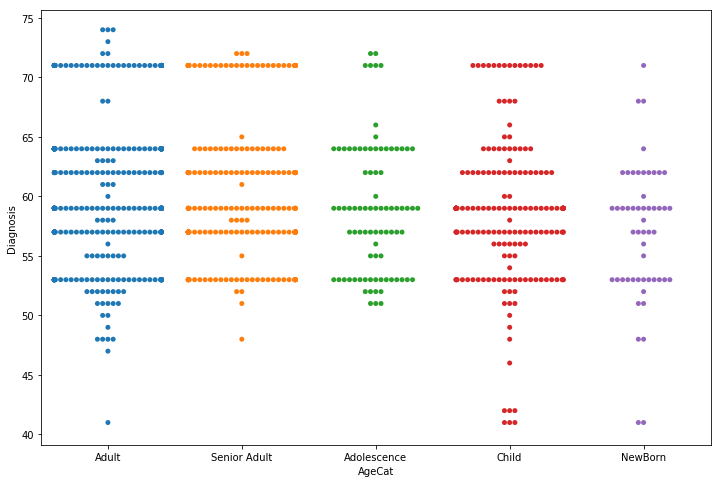

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(12,8))
sns.swarmplot(x='AgeCat', y='Diagnosis', data=workingSample)

Как видим, у 3-х наиболее часто встречающихся в выборке групп (возрослые, старики, дети), четко видны 6 наиболее частых травм, а у подростков и младенцев - 4 наиболее частые травмы. Давайте узнаем что это за травмы:

In [15]:
from collections import Counter
Counter(workingSample[workingSample.AgeCat == 'Adult'].Diagnosis).most_common(6)

[(64, 84), (59, 83), (71, 66), (53, 64), (57, 50), (62, 31)]

Итак, топ-6 травм взрослых:

64 (84 раза) - растяжение связок <br>
59 (83 раза) - разрыв связок / рваная рана <br>
71 (66 раз) - "другое", не учтено в списке диагнозов <br>
53 (64 раза) - ушибы, ссадины <br>
57 (50 раз) - перелом <br>
62 (31 раз) - повреждение внутренних органов

Рассмотрим теперь "старых" пациентов:

In [16]:
Counter(workingSample[workingSample.AgeCat == 'Senior Adult'].Diagnosis).most_common(6)

[(57, 68), (71, 42), (62, 36), (53, 33), (59, 28), (64, 18)]

Топ-6 травм стариков:

57 (68 раз) - перелом <br>
71 (42 раза) - "другое", не учтено в списке диагнозов <br>
62 (36 раз) - повреждение внутренних органов <br>
53 (33 раза) - ушибы, ссадины <br>
59 (28 раз) - разрыв связок / рваная рана <br>
64 (18 раз) - растяжение связок

Перейдем к детям:

In [17]:
Counter(workingSample[workingSample.AgeCat == 'Child'].Diagnosis).most_common(6)

[(59, 61), (57, 26), (53, 26), (62, 18), (71, 14), (64, 10)]

Топ-6 травм у детей:

59 (61 раз) - разрыв связок / рваная рана <br>
57 (26 раз) - перелом <br>
53 (26 раз) - ушибы, ссадины <br>
62 (18 раз) - повреждение внутренних органов <br>
71 (14 раз) - "другое", не учтено в списке диагнозов <br>
64 (10 раз) - растяжение связок

Перейдем к подросткам:

In [18]:
Counter(workingSample[workingSample.AgeCat == 'Adolescence'].Diagnosis).most_common(4)

[(59, 17), (53, 16), (64, 16), (57, 11)]

Топ-4 травмы подростков:

59 (17 раз) - разрыв связок / рваная рана <br>
53 (16 раз) - ушибы, ссадины <br>
64 (16 раз) - растяжение связок <br>
57 (11 раз) - перелом

Наконец, рассмотрим младенцев:

In [19]:
Counter(workingSample[workingSample.AgeCat == 'NewBorn'].Diagnosis).most_common(4)

[(53, 12), (59, 12), (62, 9), (57, 5)]

Топ-4 травмы младенцев:

53 (12 раз) - ушибы, ссадины <br>
59 (12 раз) - разрыв связок / рваная рана <br>
62 (9 раз) - повреждение внутренних органов <br>
57 (5 раз) - перелом

**Вывод:** наиболее частые травмы у всех возрастных групп идентичны, различается только их порядок в топе.

Рассмотрим далее наиболее частые травмы у разных возрастных групп с точки зрения места их получения. При этом добавим в промежуточные датафреймы колонку Dfreq - частоту встречаемости тех или иных травм у конкретной возрастной категории:

Adolescence
    Dfreq  Diagnosis  Location
54   17.0         59         1
43   16.0         64         0
46   16.0         53         5
29   11.0         57         0
38    4.0         62         8
68    4.0         71         9

Adult
     Dfreq  Diagnosis  Location
199   84.0         64         0
190   83.0         59         1
329   66.0         71         1
175   64.0         53         1
23    50.0         57         1
370   31.0         62         5

Child
     Dfreq  Diagnosis  Location
96    61.0         59         1
1     26.0         57         1
183   26.0         53         0
129   18.0         62         1
111   14.0         71         0
28    10.0         64         0

NewBorn
    Dfreq  Diagnosis  Location
26   12.0         53         1
28   12.0         59         1
43    9.0         62         1
2     5.0         57         1
29    2.0         48         1
24    2.0         51         0

Senior Adult
     Dfreq  Diagnosis  Location
79    68.0         57         1
232  

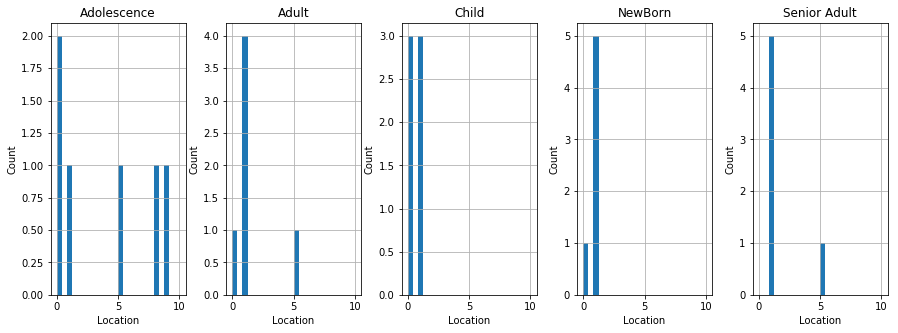

In [20]:
import numpy as np
fig, axes = plt.subplots(1, 5, figsize=(15,5))
j = 0
for group, groupDf in workingSample.groupby('AgeCat'):
    groupDf = groupDf.reset_index(drop = True)
    for i in range(len(groupDf.Diagnosis)):
        groupDf.loc[i, 'Dfreq'] = groupDf.Diagnosis.value_counts()[groupDf.loc[i, 'Diagnosis']]
    print(group)
    plotData = groupDf.sort_values(by='Dfreq', ascending=False).drop_duplicates(
        subset=['Diagnosis'], keep='first')[['Dfreq', 'Diagnosis', 'Location']].head(6)
    print(plotData)
    plotData.hist(column='Location', bins=np.linspace(0,10,25), ax=axes[j])
    axes[j].set_title('{}'.format(group))
    axes[j].set_xlabel('Location')
    axes[j].set_ylabel('Count')
    j += 1
    print()

На гистограммах наглядно видно, что младенцы и старики почти все наиболее популярные травмы получают дома, что, в общем-то, логично. Подростки также ведут себя ожидаемо - получают травмы в самых разных местах (в частности, на спортплощадках и в школе). Неожиданно ведут себя взрослые и дети от 2-х до 12-ти лет: дети половину всех травм получают дома, а о другой половине информации нет, а взрослые получают дома целых две трети наиболее популярных для своей возрастной категории травм.

Посмотрим, какие предметы и места являются наиболее опасными для каждой из возрастных категорий. Для этого, учитывая правила, описанные во вводном разделе, отформатируем клонки Product_1 и Product_2.

In [21]:
for i in range(len(workingSample.Product_1)):
    if workingSample.loc[i, 'Product_1'] == 0:
        workingSample.loc[i, 'Product_1'] = workingSample.loc[i, 'Product_2']
    elif workingSample.loc[i, 'Product_2'] == 0:
        workingSample.loc[i, 'Product_2'] = workingSample.loc[i, 'Product_1']
print(workingSample[workingSample.AgeCat == 'Adolescence'].Product_1.value_counts()[:2])
print(workingSample[workingSample.AgeCat == 'Adolescence'].Product_2.value_counts()[:2])

1205    16
5040     5
Name: Product_1, dtype: int64
1205    14
1807     7
Name: Product_2, dtype: int64


Для подростков опаснее всего:

1205 - игра в баскетбол <br>
5040 - велосипед

Самое опасное место:

1807 - скользкий пол

In [22]:
print(workingSample[workingSample.AgeCat == 'Adult'].Product_1.value_counts()[:2])
print(workingSample[workingSample.AgeCat == 'Adult'].Product_2.value_counts()[:2])

1842    76
1807    28
Name: Product_1, dtype: int64
1842    66
1807    38
Name: Product_2, dtype: int64


Для взрослых опаснее всего:

1842 - ступеньки <br>
1807 - скользкий пол

In [23]:
print(workingSample[workingSample.AgeCat == 'Child'].Product_1.value_counts()[:2])
print(workingSample[workingSample.AgeCat == 'Child'].Product_2.value_counts()[:2])

4076    20
4057    11
Name: Product_1, dtype: int64
1807    15
4057    11
Name: Product_2, dtype: int64


Для детей опаснее всего:

4076 - каркас кровати (видимо они бьются дома о них) <br>
4057 - столы <br>
1807 - скользкий пол

Теперь понятно, почему большиснтво травм дети получают дома.

In [24]:
print(workingSample[workingSample.AgeCat == 'Senior Adult'].Product_1.value_counts()[:2])
print(workingSample[workingSample.AgeCat == 'Senior Adult'].Product_2.value_counts()[:2])

1807    54
1842    32
Name: Product_1, dtype: int64
1807    66
1842    29
Name: Product_2, dtype: int64


Для стариков опаснее всего:

1807 - скользкий пол <br>
1842 - ступеньки

То же, что и для взрослых, но в другом порядке.

In [25]:
print(workingSample[workingSample.AgeCat == 'NewBorn'].Product_1.value_counts()[:2])
print(workingSample[workingSample.AgeCat == 'NewBorn'].Product_2.value_counts()[:2])

1807    8
4076    6
Name: Product_1, dtype: int64
1807    15
4076     3
Name: Product_2, dtype: int64


Для новорожденных опаснее всего:

1807 - скользкий пол <br>
4076 - каркас кровати

**Вывод:** Скользкий пол - бич всех возрастов. В зрелом возрасте и старости, при этом, аккуратнее нужно быть также со ступеньками, а для всех детей младше 12-ти лет опасны домашние предметы мебели. С подростками все так как и должно быть.

В завершении исследования травм по возрастным группам, проверим, какая возрастная категория больше всех страдает от огня. Также для большей информативности добавим пол.

In [26]:
for group2, groupDf2 in workingSample[~(workingSample.Fire_Involvement == 0)].groupby('AgeCat'):
    print(group2)
    print(groupDf2[['Sex', 'Fire_Involvement']])
    print()

Adolescence
     Sex  Fire_Involvement
484    1                 1

Adult
     Sex  Fire_Involvement
485    2                 1
691    1                 2
892    1                 2

Child
     Sex  Fire_Involvement
466    1                 1
486    1                 1
924    1                 2

Senior Adult
     Sex  Fire_Involvement
830    1                 3



Как видим, наибольшие проблемы с огнем у взрослых и детей от 2-х до 12-ти лет. Забавно, что единственная женщина в этом срезе взрослая, и только в её случае среди взрослых были вызваны пожарные. При этом то, что в остальных двух случаях пожарных не было, как минимум говорит о том, что эти мужчины сами не пожарные и получили травму по неосторожности. Мальчикам из категории 2-12 также лучше спички в руки не давать, 2 из 3-х имеющихся случаев привели к вызову пожарных. Наиболее удивительно, что с огнем очень мало контактируют подростки, они также осторожны, как и старики. Новорожденные, к счастью, с огнем не контактировали вообще.

Мы уже немного затронули тему пола, поэтому в следующем этапе исследования возьмем за основу именну эту колонку данных.

**Sex**

Для начала, рассмотрим общее распределение полов в выборке:

In [27]:
workingSample.Sex.value_counts(normalize=True)

1    0.521042
2    0.478958
Name: Sex, dtype: float64

Как видим, соотношение примерно равное, поэтому все выводы, сделанные нами относительно соотношения пола и огнеопасности, можно считать легитимными, хотя выборка, конечно, получилась маленькая.

Наиболее интересно с точки зрения пола, пожалуй, распределение диагнозов:

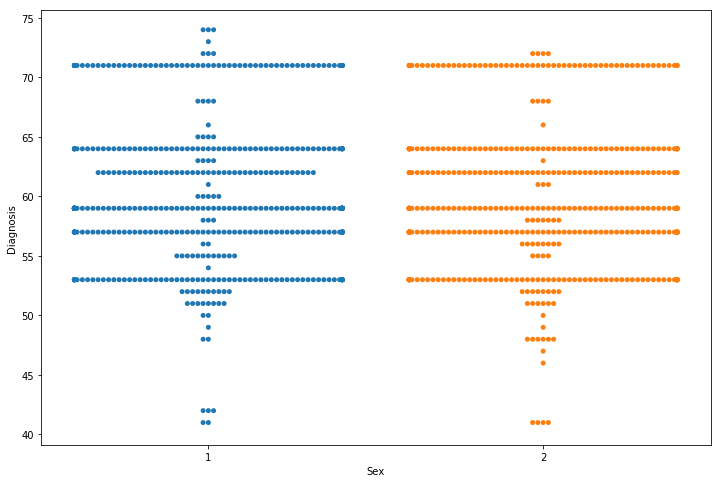

In [28]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Sex', y='Diagnosis', data=workingSample)

Как видим, в общем, мужчины и женщины травмируются одинаково. Расследуем это глубже. Посмотрим, какие части тела чаще всего травмируют мужчины и женщины и в каком возрасте. Для каждой части тела при этом добавим значение Trauma_freq - частота травмирования той или иной части тела у представителей конкретного пола.

1
     Body_Part  Trauma_freq        AgeCat
0           75     0.144231         Adult
400         76     0.111538         Adult
257         79     0.094231  Senior Adult
280         92     0.084615         Adult
467         82     0.069231         Adult

2
     Body_Part  Trauma_freq        AgeCat
0           75     0.177824         Adult
243         79     0.100418         Adult
221         76     0.092050       NewBorn
204         92     0.087866         Adult
424         31     0.071130  Senior Adult



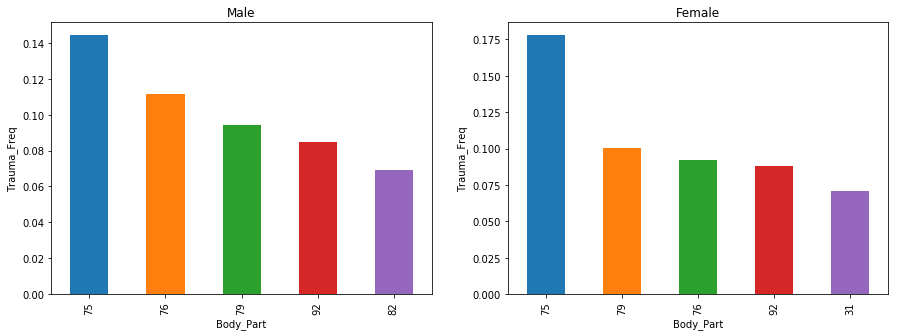

In [29]:
fig2, axes2 = plt.subplots(1, 2, figsize=(15,5))
k = 0
for group3, groupDf3 in workingSample.groupby('Sex'):
    groupDf3 = groupDf3.reset_index(drop = True)
    for i in range(len(groupDf3.Body_Part)):
        groupDf3.loc[i, 'Trauma_freq'] = groupDf3.Body_Part.value_counts(normalize=True)[groupDf3.loc[i, 'Body_Part']]
    print(group3)
    plotData2 = groupDf3.sort_values(by='Trauma_freq', ascending=False).drop_duplicates(
        subset=['Body_Part'], keep='first')[['Body_Part', 'Trauma_freq', 'AgeCat']].head(5)
    print(plotData2)
    plotData2.plot(x='Body_Part', y='Trauma_freq', kind='bar', ax=axes2[k], legend=False)
    if group3 == 1:
        axes2[k].set_title('Male')
    else:
        axes2[k].set_title('Female')
    axes2[k].set_xlabel('Body_Part')
    axes2[k].set_ylabel('Trauma_Freq')
    k += 1
    print()

Итак, и у мужчин, и у женщин, самая травмируемая часть тела - голова (75). Далее у мужчин идет лицо (76) и нижняя часть туловища (79), у женщин - то же, но в обратном порядке. Причем интересно, что лицо женщины травмируют в основном в младенчестве, а мужчины травмируют нижнюю часть туловища в старости. При этом, это единственные позиции, по которым возрастная категория не сооветствует самой обширной - взрослым. На 4-м месте у обоих полов пальцы (92), причем примерно с одинаковой частотой в выборке. Отличаются лишь 5-е позиции: у мужчин - руки (82), у женщин - верхняя часть туловища (31).

**Вывод:** в целом, распределение популярных травм по полам и возрастам почти не отличается, за исключением описанного выше.

В ислледовании опасных предметов для разных возрастов мы выяснили, что представляет наибольшую опасность для каждой группы населения. Логично предположить, что для взрослых, детей и стариков эти предметы по полам отличаться не будут. Однако, для подростков, у которых абсолютное разные предпочтения в этом возрасте, они могут отличаться. Проверим это:

In [30]:
for group4, groupDf4 in workingSample.groupby('Sex'):
    print(group4)
    print(groupDf4[groupDf4.AgeCat == 'Adolescence'].Product_1.value_counts()[:5])
    print(groupDf4[groupDf4.AgeCat == 'Adolescence'].Product_2.value_counts()[:5])
    print()

1
1205    11
1270     4
5040     4
604      2
1233     2
Name: Product_1, dtype: int64
1205    10
1270     4
5040     4
1884     3
3272     2
Name: Product_2, dtype: int64

2
1205    5
1893    3
1807    3
1726    2
3254    2
Name: Product_1, dtype: int64
1807    6
1205    4
1893    3
1726    2
3254    2
Name: Product_2, dtype: int64



Неожиданно, но на первом месте по травмаопасности и для мальчиков, и для девочек - баскетбол, а далее уже идут предполагаемые изменения.

Для мальчиков подростков:

1270 - борьба <br>
5040 - велосипед <br>
604 - парты, комоды и тд <br>
1233 - трамплины <br>
1884 - потолки и стены (?!) <br>
3272 - хоккей <br>

Для девочек подростков:

1893 - двери <br>
1807 - скользкий пол <br>
1726 - шкафчики <br>
3254 - чирлидинг <br>

**Вывод:** не считая баскетбола, в подростковом возрасте, девочки и мальчики, все же, ведут себя ожидаемо по-разному.

Перейдем к анализу рас.

**Race**

Здесь, пожалуй, единственное, что нас интересует - это распределние диагнозов по рассам.

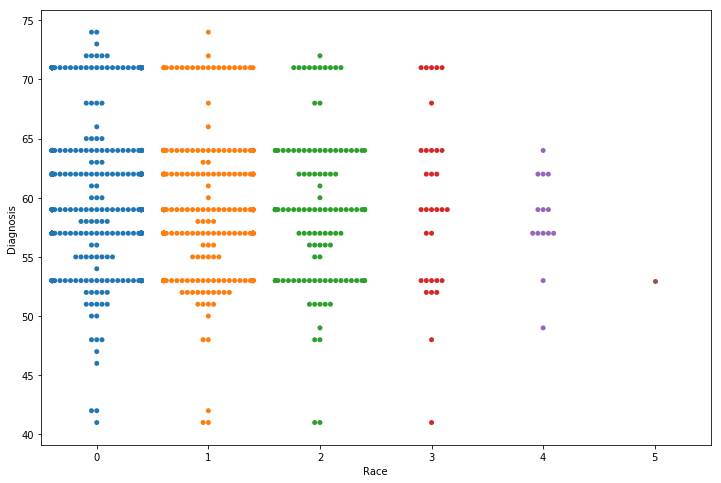

In [31]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Race', y='Diagnosis', data=workingSample)

Как видим, для случаев белых (0), черных (1) и не записанной рассы (0) - распределение диагнозов выглядит похоже, однако явно наблюдаются некоторые диагнозы, присутствующие у белых и людей с незаписанной рассой, но не присутствующие у черных. Что касается остальных 3-х расс - прежде чем делать какие-то выводы, проверим их долю в выборке:

In [32]:
workingSample.Race.value_counts(normalize=True)

0    0.490982
1    0.339679
2    0.122244
3    0.032064
4    0.014028
5    0.001002
Name: Race, dtype: float64

Как и ожидалось, их доля в выборке слишком мала, поэтому на графике они выделяются. Далее проверим, что же это за травмы, к которым у черных иммунитет:

In [33]:
nDset = set(workingSample[workingSample.Race == 0].Diagnosis)
wDset = set(workingSample[workingSample.Race == 1].Diagnosis)
Dset = nDset & wDset
bDset = set(workingSample[workingSample.Race == 2].Diagnosis)
print(Dset - bDset)

{66, 42, 74, 50, 52, 58, 63}


66 - обильное кровотечение (уже странно) <br>
42 - посторонний предмет в дыхательных путях <br>
74 - дерматит, конъюктивит <br>
50 - ампутация <br>
52 - сотрясение <br>
58 - гематома <br>
63 - прокол

**Вывод:** на самом деле, доля черных в выборке заметно меньше белых и не указанных, а выявленные нами диагнозы встречаются в выборке довольно редко, так что врядли можно всерьез рассуждать на тему частоты встречаемости этих травм у черных по сравнению с другими рассами. Да и среди людей с неуказанной рассой также вполне могут встречаться черные.

Завершим наше исследование анализом типов больниц.

**Stratum**

Что нас может интересовать в этой части - так это график загруженности каждой из типов больниц по дням. В выборке представлены следующие даты:

In [34]:
workingSample.Treatment_Date.value_counts()

2017-01-01    327
2017-01-02    276
2017-01-03    241
2017-01-04    154
Name: Treatment_Date, dtype: int64

Добавим в выборку колонку с загруженностью каждой из больниц по типам и дням (Daily_Heat), а затем построим по этой информации catplot:

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


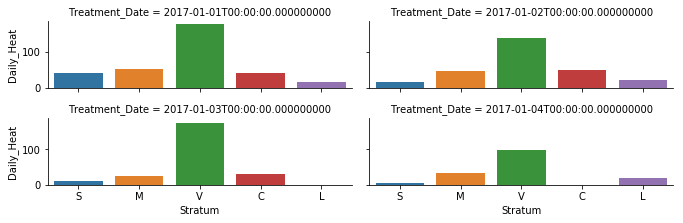

In [35]:
dateList = []
for i in range(len(workingSample.Treatment_Date.value_counts())):
    dateList.append(workingSample.Treatment_Date.value_counts().index[i])
for j in range(len(workingSample.Stratum)):
    for k in range(len(dateList)):
        if workingSample.loc[j, 'Treatment_Date'] == dateList[k]:
            workingSample.loc[j, 'Daily_Heat'] = workingSample[
                workingSample.Treatment_Date == dateList[k]].Stratum.value_counts()[workingSample.loc[j, 'Stratum']]
sns.catplot(x='Stratum', y='Daily_Heat', col='Treatment_Date', col_wrap=2,
            kind='bar', height=1.6, aspect=3, data=workingSample)

Как видим, очень большие больницы в любой день намного загруженее остальных. Странно, но самыми незагруженными часто бывают просто большие больницы (как в 1-й и 3-й день). Вторые по загруженности - средние, а остальные 3 категории могут распределяться как угодно или даже вообще пустовать (как большие в 3-й день и детские в 4-й).

В завершении всего исследования посмотрим, как распределены исходы лечения пациентов:

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


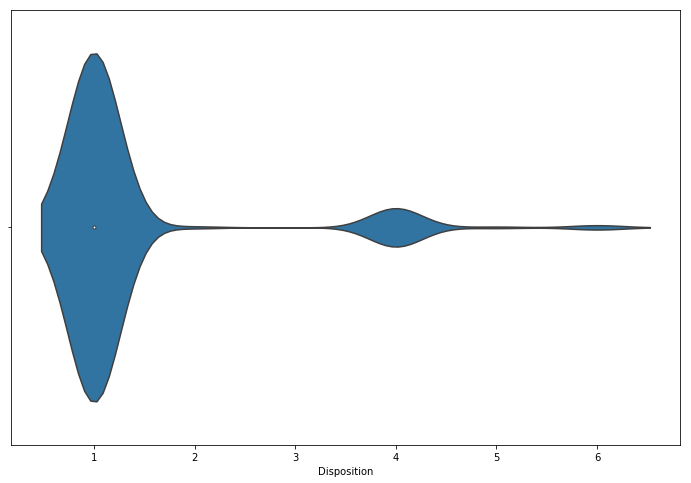

In [36]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Disposition', data=workingSample)

При этом численное распределение такое:

In [37]:
workingSample.Disposition.value_counts()

1    881
4     97
6     11
2      5
5      4
Name: Disposition, dtype: int64

**Вывод:** в подавляющем большиснтве случаев, лечение заканчивается выписыванием пациента (1), на втором месте - госпитализация (4), на третьем уход пациентов по собственной воле (6). Оставшихся 2-х случаев на графике почти не видно - это перевод в другую больницу (2) и задержание пациента для осмотра (5).

In [38]:
# Задача 2
import requests
from bs4 import BeautifulSoup
# Функция скачивания изображения
def getImage(url, imageNumber):
    response = requests.get(url)
    with open('img{}.jpg'.format(imageNumber), 'wb') as fout:
        fout.write(response.content)
    del response
# Скачаем изображения с обеих страниц
for i in range(1, 3):
    link = 'https://www.kinopoisk.ru/film/zvyozdnye-voyny-poslednie-dzhedai-2017-718223/posters/page/{}/'.format(i)
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')
    del response
    # Рассмотрим только часть с постерами
    posters = soup.findAll('table', {'class': 'js-rum-hero fotos'})[0]
    soup2 = BeautifulSoup(str(posters), 'html.parser')
    if i == 1:
        imageNumber = 0
    for image in soup2.findAll('img'):
        imageNumber += 1
        getImage(image['src'], imageNumber)   